In [2]:
import numpy as np
from matplotlib import colors
from matplotlib.ticker import PercentFormatter
import matplotlib.pyplot as plt
import math
import os
import csv
import pandas as pd
from sympy import *
# os.chdir("C:/Users/User/Google Drive/FUBerlin/Masterarbeit/IntermediateFiles/DecisionTask")
print("Current Working directory " , os.getcwd())

Current Working directory  C:\Users\User\GitHub\WebET_Analysis\Finding_K


# Export

In [3]:
def View(df):
    css = """<style>
    table { border-collapse: collapse; border: 3px solid #eee; }
    table tr th:first-child { background-color: #eeeeee; color: #333; font-weight: bold }
    table thead th { background-color: #eee; color: #000; }
    tr, th, td { border: 1px solid #ccc; border-width: 1px 0 0 1px; border-collapse: collapse;
    padding: 3px; font-family: monospace; font-size: 10px }</style>
    """
    s  = '<script type="text/Javascript">'
    s += 'var win = window.open("", "Title", "toolbar=no, location=no, directories=no, status=no, menubar=no, scrollbars=yes, resizable=yes, width=780, height=200, top="+(screen.height-400)+", left="+(screen.width-840));'
    s += 'win.document.body.innerHTML = \'' + (df.to_html() + css).replace("\n",'\\') + '\';'
    s += '</script>'
    return(HTML(s+css))

# 1 Analyzing Amasino's (Dianna's) data

## 1.1 Data prepare_datasets

### 1.1.1 Import

In [4]:
data_amasino = pd.read_csv("amasinoEtAl_behavior.csv", header=None) \
    .rename(columns={0:"ID", 1: "aSS", 2: "aLL", 3: "tSS", 4: "tLL", 5: "choseLL", 6: "rt", 7: "LLonLeft", 8: "condition"})
print(data_amasino.head(10))

   ID  aSS  aLL  tSS  tLL  choseLL        rt  LLonLeft  condition
0   1  4.0   10    0  365      1.0  4.804574         0          2
1   1  3.0   10    0  365      1.0  1.341040         0          2
2   1  7.5   10    0   30      1.0  1.831145         1          2
3   1  3.5   10    0    7      1.0  1.576825         1          2
4   1  7.0   10    0   15      1.0  1.698946         1          2
5   1  0.5   10    0  180      1.0  1.861560         1          2
6   1  7.0   10    0    1      1.0  2.772035         0          2
7   1  9.0   10    0  365      0.0  2.590511         0          2
8   1  1.0   10    0   15      1.0  2.705389         1          2
9   1  3.0   10    0   15      1.0  2.111287         0          2


### 1.1.2 Adding variables (choseSS and reward for each trial)

In [5]:
data_amasino["choseSS"] = 1-data_amasino["choseLL"]
data_amasino["reward"]=data_amasino["aLL"]*data_amasino["choseLL"]+data_amasino["aSS"]*(1-data_amasino["choseLL"])
data_amasino["aSS_aLL_ratio"] = data_amasino["aSS"] / data_amasino["aLL"]
data_amasino["aLL_tLL_ratio"] = data_amasino["aLL"] / data_amasino["tLL"]
print(data_amasino.head())

   ID  aSS  aLL  tSS  tLL  choseLL        rt  LLonLeft  condition  choseSS  \
0   1  4.0   10    0  365      1.0  4.804574         0          2      0.0   
1   1  3.0   10    0  365      1.0  1.341040         0          2      0.0   
2   1  7.5   10    0   30      1.0  1.831145         1          2      0.0   
3   1  3.5   10    0    7      1.0  1.576825         1          2      0.0   
4   1  7.0   10    0   15      1.0  1.698946         1          2      0.0   

   reward  aSS_aLL_ratio  aLL_tLL_ratio  
0    10.0           0.40       0.027397  
1    10.0           0.30       0.027397  
2    10.0           0.75       0.333333  
3    10.0           0.35       1.428571  
4    10.0           0.70       0.666667  


## 1.2 Defining add_k

In [6]:
def add_k(aSS, aLL, tLL):
    add_k = (aLL / aSS - 1) / tLL
    return(add_k)
print("add_k = ")
sympify('(aLL/aSS - 1) / tLL')

add_k = 


(aLL/aSS - 1)/tLL

add_k is an individual parameter for the strength of the delay discount. The higher add_k, the higher the incentive for aSS. Every question has a certain add_k, assuming that the subjective value of aSS is is equal to aLL 

In [7]:
data_amasino["add_k"] =  (data_amasino["aLL"]/data_amasino["aSS"] - 1) / data_amasino["tLL"]
print(data_amasino.head())

   ID  aSS  aLL  tSS  tLL  choseLL        rt  LLonLeft  condition  choseSS  \
0   1  4.0   10    0  365      1.0  4.804574         0          2      0.0   
1   1  3.0   10    0  365      1.0  1.341040         0          2      0.0   
2   1  7.5   10    0   30      1.0  1.831145         1          2      0.0   
3   1  3.5   10    0    7      1.0  1.576825         1          2      0.0   
4   1  7.0   10    0   15      1.0  1.698946         1          2      0.0   

   reward  aSS_aLL_ratio  aLL_tLL_ratio         add_k  
0    10.0           0.40       0.027397  0.004110  
1    10.0           0.30       0.027397  0.006393  
2    10.0           0.75       0.333333  0.011111  
3    10.0           0.35       1.428571  0.265306  
4    10.0           0.70       0.666667  0.028571  


## Choice probability for each item

In [8]:
df = data_amasino.groupby(['aSS', 'aLL', 'tLL'])['choseLL'].mean() \
    .reset_index()
df['add_k'] = add_k(data_amasino['aSS'], data_amasino['aLL'], data_amasino['tLL'])
df = df.sort_values(by='choseLL')
View(df)

Since, aSS < aLL, we want to know at which discount parameters add_k aSS is never preferred over aLL 

In [9]:
conditions_amasino = data_amasino.groupby(["aSS", "aLL", "aSS_aLL_ratio", "tLL", "add_k"])["choseSS"].sum() \
    .add_suffix('').reset_index()
conditions_amasino.columns = ['aSS', 'aLL', 'aSS_aLL_ratio', 'tLL', 'add_k', 'N_choseSS']
conditions_n = data_amasino.groupby(["aSS", "aLL", "aSS_aLL_ratio", "tLL", "add_k"])["choseSS"].count() \
    .add_suffix('').reset_index()
conditions_n.columns = ['aSS', 'aLL', 'aSS_aLL_ratio', 'tLL', 'add_k', 'N']
conditions_amasino = conditions_amasino.merge(conditions_n, on=["aSS", "aLL", "aSS_aLL_ratio", "tLL", "add_k"])
conditions_amasino["choseSS"] = conditions_amasino["N_choseSS"] / conditions_amasino["N"]
conditions_amasino[conditions_amasino.columns] = conditions_amasino[conditions_amasino.columns].apply(pd.to_numeric)
print(conditions_amasino)

      aSS  aLL  aSS_aLL_ratio  tLL          add_k  N_choseSS    N   choseSS
0     0.5   10           0.05    1  19.000000        0.0  117  0.000000
1     0.5   10           0.05    7   2.714286        2.0  115  0.017391
2     0.5   10           0.05   15   1.266667        1.0  116  0.008621
3     0.5   10           0.05   30   0.633333        4.0  113  0.035398
4     0.5   10           0.05   90   0.211111       11.0  116  0.094828
..    ...  ...            ...  ...        ...        ...  ...       ...
136   9.5   10           0.95   30   0.001754       75.0  116  0.646552
137   9.5   10           0.95   90   0.000585       85.0  114  0.745614
138   9.5   10           0.95  180   0.000292       98.0  114  0.859649
139   9.5   10           0.95  365   0.000144      100.0  115  0.869565
140  10.0   10           1.00    1   0.000000      100.0  113  0.884956

[141 rows x 8 columns]


## 1.3 add_k relates do decision difficulty

Check if add_k and P(chose SS) can be modeled

Length: 141
add_k Min: 0.0     add_k Max: 19.0


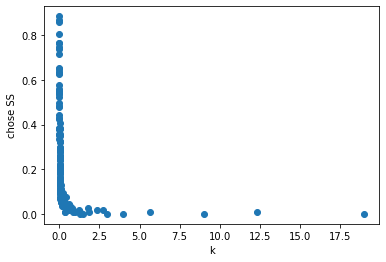

In [10]:
x = conditions_amasino.add_k
y = conditions_amasino.choseSS

round_num = 8
print('Length: ' + str(len(conditions_amasino)) + "\n" + 
     'add_k Min: ' + str(round(conditions_amasino.add_k.min(), round_num)) + 
      '     add_k Max: ' + 
      str(round(conditions_amasino.add_k.max(), round_num)))
fig, ax = plt.subplots()
ax.scatter(x, y)
ax.set_xlabel('add_k')
ax.set_ylabel('chose SS')
plt.show()

Find the add_k's where the decision is difficult

In [11]:
conditions_amasino_select = conditions_amasino[
    (conditions_amasino["choseSS"] < 0.9) & 
    (conditions_amasino["choseSS"] > 0.1)]
x = conditions_amasino_select.add_k
y = conditions_amasino_select.choseSS

round_num = 16
print('Number of datapoints: ' + str(len(conditions_amasino_select)) + "\n"
    'add_k Min: ' + str(round(conditions_amasino_select.add_k.min(), round_num)) + 
      '     add_k Max: ' + str(round(conditions_amasino_select.add_k.max(), round_num)) + 
      '\n')
fig, ax = plt.subplots()
ax.scatter(x, y)
plt.show()

Number of datapoints: 84
add_k Min: 0.0     add_k Max: 0.1



In [12]:
conditions_amasino_select = conditions_amasino[
    conditions_amasino["add_k"] < 0.33334]
x = conditions_amasino_select.add_k
y = conditions_amasino_select.choseSS

round_num = 16
print('Number of datapoints: ' + str(len(conditions_amasino_select)) + "\n"
    'choseSS Min: ' + str(round(conditions_amasino_select['choseSS'].min(), round_num)) + 
      'choseSS Max: ' + str(round(conditions_amasino_select['choseSS'].max(), round_num)) + 
      '\n')
fig, ax = plt.subplots()
ax.scatter(x, y)
plt.show()

Number of datapoints: 114
choseSS Min: 0.0087719298245614choseSS Max: 0.8849557522123894



In [13]:
(1/0.5-1)/180

0.005555555555555556

## 2 WebET conditions (my study)

### 2.1 What add_k-range to choose? 

In [14]:
sympify('(aLL/aSS - 1) / tLL')

(aLL/aSS - 1)/tLL

**add_k Min**

add_k is small if one of the two conditions are met:
- aSS is large
- tLL is large

Question 1: With the minimum difference between aSS and aLL (largest aSS), how small should the delay be at minimum for a difficult decision?

**add_k Max**

add_k is large if one of the two conditions are met:
- aSS is small
- tLL is small

Question 2: With the maximum difference between aSS and aLL (largest aSS), how large should the delay be at minimum for a difficult decision?

In [15]:
print('Amasino Conditions: \n' + 
      'add_k Min: ' + str(round(conditions_amasino_select.add_k.min(), round_num)) + 
      '     add_k Max: ' + str(round(conditions_amasino_select.add_k.max(), round_num)) + 
      '\n')
    
data_kRange = pd.DataFrame([["Large aSS/aLL-ratio, min  delay", 1, 1.5, 1],
                            ["Large aSS/aLL-ratio, min delay", 4.5, 5, 1],
                            ["Small aSS, max delay", 1, 5, 180], 
                            ["Large aSS, max delay", 4.5, 5, 180],          
                            ["Small aSS, max allowed  delay", 1, 5, 180],
                            ["Large aSS, min required delay", 4.5, 5, 7]]
                           , columns = ["Description", "aSS", "aLL", "Delay"])
data_kRange["add_k"] = add_k(data_kRange["aSS"], data_kRange["aLL"], data_kRange["Delay"])
print(data_kRange.sort_values(by=["add_k"]))

Amasino Conditions: 
add_k Min: 0.0     add_k Max: 0.3333333333333334

                       Description  aSS  aLL  Delay         add_k
3             Large aSS, max delay  4.5  5.0    180  0.000617
5    Large aSS, min required delay  4.5  5.0      7  0.015873
2             Small aSS, max delay  1.0  5.0    180  0.022222
4    Small aSS, max allowed  delay  1.0  5.0    180  0.022222
1   Large aSS/aLL-ratio, min delay  4.5  5.0      1  0.111111
0  Large aSS/aLL-ratio, min  delay  1.0  1.5      1  0.500000


### 2.2 Generate Conditions

I will set a maximum add_k-value of 0.33

In [16]:
def randomDataset():
    aSS = np.arange(0.5, 5.5, 0.5)
    aLL = np.arange(4, 5.5, 0.5)
    tLL = [1, 7, 15, 30, 90, 180]
    mydf = [['aSS', 'aLL', 'tLL']]
    for i_aSS in range(0, len(aSS)):  
        for i_aLL in range(0, len(aLL)):
            for i_tLL in range(0, len(tLL)):
                if (aSS[i_aSS]<aLL[i_aLL]):
                    mydf.append([aSS[i_aSS], aLL[i_aLL], tLL[i_tLL]])
    mydf = pd.DataFrame(mydf)
    mydf.columns = mydf.iloc[0]
    mydf = mydf.drop([0])
    return mydf

conditions_schneegans = randomDataset()
conditions_schneegans["aSS_aLL_ratio"] = conditions_schneegans["aSS"] / conditions_schneegans["aLL"]


conditions_schneegans["add_k"] = add_k(conditions_schneegans["aSS"], 
                         conditions_schneegans["aLL"], 
                         conditions_schneegans["tLL"])
conditions_schneegans[conditions_schneegans.columns] = conditions_schneegans[conditions_schneegans.columns].apply(pd.to_numeric)
conditions_schneegans_select = conditions_schneegans.loc[
    (conditions_schneegans["add_k"] <= 0.33)
].reset_index()
print("Compare my dataset to Dianna Amasino's \n")
print(round(pd.DataFrame(
                         [
                             [len(conditions_schneegans), len(conditions_schneegans_select), len(conditions_amasino_select)],
                             [conditions_schneegans.add_k.min(), conditions_schneegans_select.add_k.min(), conditions_amasino_select.add_k.min()],
                             [conditions_schneegans.add_k.max(), conditions_schneegans_select.add_k.max(), conditions_amasino_select.add_k.max()],
                         ], 
                         columns = ["Schneegans, all Combinations", "Schneegans, selection", "Amasino, selection"],
                         index = [
                             "Length", 
                             "add_k Min", 
                             "add_k Max"
                         ]), 8
           )
     )
print("\n")

print("Sample dataset of my conditions")
# View(conditions_schneegans_select)
conditions_schneegans_select.to_csv("conditions.csv")

Compare my dataset to Dianna Amasino's 

        Schneegans, all Combinations  Schneegans, selection  \
Length                    144.000000             115.000000   
add_k Min                       0.000617               0.000617   
add_k Max                       9.000000               0.300000   

        Amasino, selection  
Length          114.000000  
add_k Min             0.000000  
add_k Max             0.333333  


Sample dataset of my conditions


# 3 Compare Trial Characteristics

## 3.1 add_k-parameter (aLL/aSS - 1) / tLL)

The add_k-parameters of the trial show a similar frequency distribution with more trials with a lower add_k (either small delay tLL or similar rewards). 

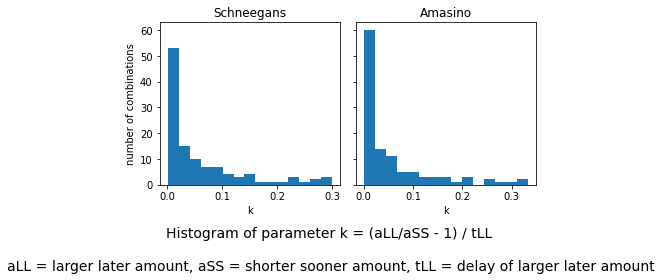

In [17]:
x1 = conditions_schneegans_select.add_k 
x2 = conditions_amasino_select.add_k 
n_bins = 15

fig, axs = plt.subplots(1, 2, sharey=True, tight_layout=True)
# We can set the number of bins with the `bins` kwarg
axs[0].hist(x1, bins=n_bins)
axs[0].set_title('Schneegans')
axs[0].set_xlabel('add_k')
axs[0].set_ylabel('number of combinations')
axs[1].hist(x2, bins=n_bins)
axs[1].set_title('Amasino')
axs[1].set_xlabel('add_k')
fig.suptitle('Histogram of parameter add_k = (aLL/aSS - 1) / tLL \n\n' +
            'aLL = larger later amount, aSS = shorter sooner amount, ' +
            'tLL = delay of larger later amount', fontsize=14, y=0)
plt.show()

## 3.2 Delays (tLL)

### 3.2.1 Frequency of shorter-sooner-options (i.e. number of conditions)

My task has a few more trials (in relative numbers) with 7 days. Apart from that, the distributions are similar.

In [18]:
frequency_tLL_schneegans = pd.crosstab(index=conditions_schneegans_select["tLL"],
                              columns="count")
frequency_tLL_amasino = pd.crosstab(index=conditions_amasino_select["tLL"],
                              columns="count")
frequency_tLL_comare = frequency_tLL_schneegans.merge(frequency_tLL_amasino, on="tLL").reset_index()
frequency_tLL_comare.columns = ["tLL", "freq_schneegans", "freq_amasino"]
frequency_tLL_comare["rel_schneegans"] = frequency_tLL_comare["freq_schneegans"] / np.nansum(frequency_tLL_comare["freq_schneegans"])
frequency_tLL_comare["rel_amasino"] = frequency_tLL_comare["freq_amasino"] / np.nansum(frequency_tLL_comare["freq_amasino"])

In [19]:
labels = frequency_tLL_comare.tLL.unique().astype(str)
x1 = frequency_tLL_comare.rel_schneegans
x2 = frequency_tLL_comare.rel_amasino
label_loc = np.arange(len(labels))  # the label locationswidth = 0.35  # the width of the bars
width = 0.35 

fig, ax = plt.subplots()
rects1 = ax.bar(label_loc - width/2, x1, width, label='Schneegans')
rects2 = ax.bar(label_loc + width/2, x2, width, label='Tim')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Relative frequency')
ax.set_xticks(label_loc)
ax.set_xticklabels(labels)
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(round(height, 2)),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)
fig.tight_layout()
plt.title("relative frequency of the combinations across delays")
print(frequency_tLL_comare)
plt.show()

   tLL  freq_schneegans  freq_amasino  rel_schneegans  rel_amasino
0    1                5             6        0.043478     0.063830
1    7               17            14        0.147826     0.148936
2   15               21            16        0.182609     0.170213
3   30               24            18        0.208696     0.191489
4   90               24            20        0.208696     0.212766
5  180               24            20        0.208696     0.212766


### 3.2.2 Shorter-sooner-amount distribution for each delay option

Both study designs show similar patterns. Within the shorter delays, all amounts are present. At the short delays (1 & 7 days), the rewards move towards larger shorter-sooner-amounts. 

In [20]:
tLL_values = conditions_schneegans_select["tLL"].unique()
output = []
for i in range(0, len(tLL_values)):
    x1 = str(conditions_schneegans_select[(conditions_schneegans_select["tLL"]==tLL_values[i])]["aSS"].unique())
    x2 = str(conditions_amasino_select[(conditions_amasino_select["tLL"]==tLL_values[i])]["aSS"].unique())
    output.append([tLL_values[i], x1, x2]) 
output = pd.DataFrame(output)
output.columns = ["tLL", "Schneegans", "Amasino"]
# View(output)

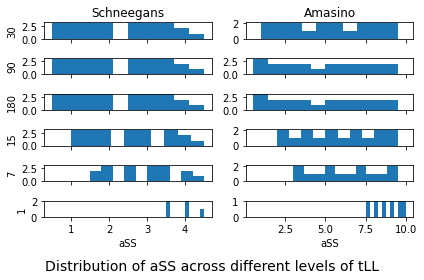

In [21]:
fig, axs = plt.subplots(6, 2, sharex="col", tight_layout=True)
tLL_values = conditions_schneegans_select["tLL"].unique()
for i in range(0, len(tLL_values)):
    x1 = conditions_schneegans_select.loc[(conditions_schneegans_select["tLL"]==tLL_values[i]), ["aSS"]]
    x2 = conditions_amasino_select.loc[(conditions_amasino_select["tLL"]==tLL_values[i]), ["aSS"]]
    axs[i, 0].hist(x1)
    axs[i, 1].hist(x2)
    axs[i, 0].set_ylabel(tLL_values[i])
    
axs[0, 0].set_title('Schneegans')
axs[0, 1].set_title('Amasino')
axs[5, 0].set_xlabel('aSS')
axs[5, 1].set_xlabel('aSS')
fig.suptitle('Distribution of aSS across different levels of tLL', fontsize=14, y=0)
plt.show()

### 3.2.3  Shorter-sooner-amount vs. add_k for each delay option

Amasino has a wider range of rewards, thats why there is a smoother add_k-function. Within a delay of 30-180 days, we allow Amasino to have a smaller amounts (< 2.5), which increases add_k. That's because my aSS/aLLL ratio is naturally limited to 0.50 vs. 5 (Amasino has 0.50 vs. 10).  

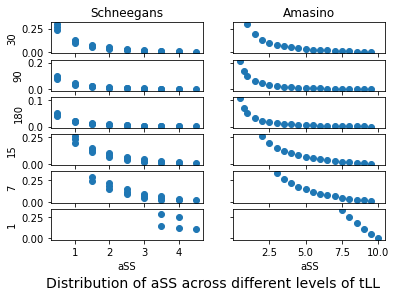

In [22]:
fig, axs = plt.subplots(6, 2, squeeze=False, sharey='row', sharex="col")
tLL_values = conditions_schneegans_select["tLL"].unique()
for i in range(0, len(tLL_values)):
    x0 = conditions_schneegans_select.loc[(conditions_schneegans_select["tLL"]==tLL_values[i]), ["aSS"]]
    y0 = conditions_schneegans_select.loc[(conditions_schneegans_select["tLL"]==tLL_values[i]), ["add_k"]]
    x1 = conditions_amasino_select.loc[(conditions_amasino_select["tLL"]==tLL_values[i]), ["aSS"]]
    y1 = conditions_amasino_select.loc[(conditions_amasino_select["tLL"]==tLL_values[i]), ["add_k"]]
    axs[i, 0].scatter(x0, y0)
    axs[i, 1].scatter(x1, y1)
    axs[i, 0].set_ylabel(tLL_values[i])
    
axs[0, 0].set_title(str("Schneegans"))
axs[0, 1].set_title(str("Amasino"))
    
axs[5, 0].set_xlabel('aSS')
axs[5, 1].set_xlabel('aSS')
fig.suptitle('Distribution of aSS across different levels of tLL', fontsize=14, y=0)
plt.show()

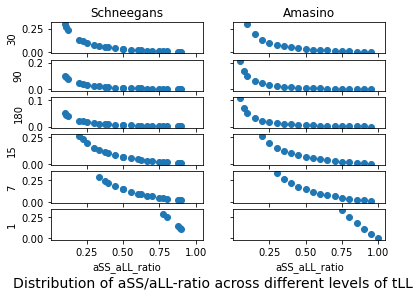

In [23]:
fig, axs = plt.subplots(6, 2, squeeze=False, sharey='row', sharex=True)
tLL_values = conditions_schneegans_select["tLL"].unique()
for i in range(0, len(tLL_values)):
    x0 = conditions_schneegans_select.loc[(conditions_schneegans_select["tLL"]==tLL_values[i]), ["aSS_aLL_ratio"]]
    y0 = conditions_schneegans_select.loc[(conditions_schneegans_select["tLL"]==tLL_values[i]), ["add_k"]]
    x1 = conditions_amasino_select.loc[(conditions_amasino_select["tLL"]==tLL_values[i]), ["aSS_aLL_ratio"]]
    y1 = conditions_amasino_select.loc[(conditions_amasino_select["tLL"]==tLL_values[i]), ["add_k"]]
    axs[i, 0].scatter(x0, y0)
    axs[i, 1].scatter(x1, y1)
    axs[i, 0].set_ylabel(tLL_values[i])
    
axs[0, 0].set_title(str("Schneegans"))
axs[0, 1].set_title(str("Amasino"))
    
axs[5, 0].set_xlabel('aSS_aLL_ratio')
axs[5, 1].set_xlabel('aSS_aLL_ratio')
fig.suptitle('Distribution of aSS/aLL-ratio across different levels of tLL', fontsize=14, y=0)
plt.show()

## 3.3 Smaller sooner amounts (aSS)

At both studies, all kinds of smaller-sooner-amounts are present in a fair number, expect 5.5 for Amasino. 

### 3.3.1 Frequency of conditions

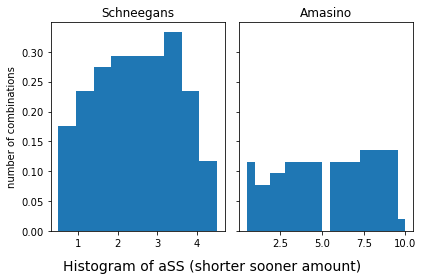

In [24]:
x1 = conditions_schneegans_select.aSS
x2 = conditions_amasino_select.aSS

fig, axs = plt.subplots(1, 2, sharey=True, tight_layout=True)
# We can set the number of bins with the `bins` kwarg
axs[0].hist(x1, bins=len(x1.unique()), density=True, stacked=True)
axs[0].set_title('Schneegans')
axs[0].set_ylabel('number of combinations')
axs[1].hist(x2, bins=len(x2.unique()), density=True, stacked=True)
axs[1].set_title('Amasino')
fig.suptitle('Histogram of aSS (shorter sooner amount)', 
             fontsize=14, y=0)
plt.show()

In [25]:
x1 = conditions_schneegans_select.aSS

plt.hist(x1, bins=len(x1.unique()))
plt.ylabel('number of combinations')
plt.title('Histogram of aSS (shorter sooner amount)')
plt.show()

In [26]:
x1 = conditions_amasino_select.aSS

plt.hist(x1, bins=len(x1.unique()))
plt.ylabel('number of combinations')
plt.title('Histogram of aSS (shorter sooner amount)')
plt.show()

### 3.3.2  add_k-values

Similar distribution between the studies. larger varying add_k for smaller shorter-sooner-amounts (aSS).

In [27]:
x1 = conditions_schneegans_select.aSS
y1 = conditions_schneegans_select.add_k
x2 = conditions_amasino_select[(conditions_amasino_select["aSS"]<5)].aSS
y2 = conditions_amasino_select[(conditions_amasino_select["aSS"]<5)].add_k
n_bins = 8

fig, axs = plt.subplots(1, 2, sharey=True, tight_layout=True)
# We can set the number of bins with the `bins` kwarg
axs[0].scatter(x1, y1)
axs[0].set_title('Schneegans')
axs[0].set_xlabel('aSS')
axs[0].set_ylabel('add_k')
axs[1].scatter(x2, y2)
axs[1].set_title('Amasino')
axs[1].set_xlabel('aSS')
fig.suptitle('Scatter plot: aSS (shorter-sooner-amount) vs. add_k', 
             fontsize=14, y=0)
plt.show()

## 3.4 Larger-later-reward-delay-ratio (aLL/tLL)

The ratio between the larger-later-amount (aLL) and its delay (tLL) is similar distributed between the studies. There are more combinations for small ratios (long delays, e.g. 30, 90, 180) and a few large ratios (1 day delay).

<ipython-input-28-0c5755e7ade2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  conditions_amasino_select["aLL_tLL-ratio"] = conditions_amasino_select.aLL / conditions_amasino_select.tLL


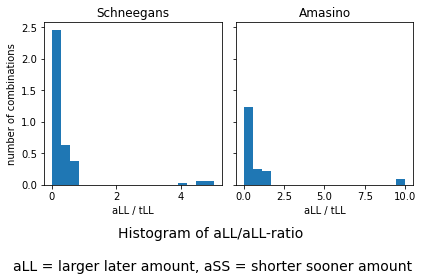

In [28]:
conditions_schneegans_select["aLL_tLL-ratio"] = conditions_schneegans_select.aLL / conditions_schneegans_select.tLL
conditions_amasino_select["aLL_tLL-ratio"] = conditions_amasino_select.aLL / conditions_amasino_select.tLL

x1 = conditions_schneegans_select["aLL_tLL-ratio"]
x2 = conditions_amasino_select["aLL_tLL-ratio"]
n_bins = len(conditions_schneegans_select["aLL_tLL-ratio"].unique())

fig, axs = plt.subplots(1, 2, sharey=True, tight_layout=True)
# We can set the number of bins with the `bins` kwarg
axs[0].hist(x1, bins=n_bins, density=True, stacked=True)
axs[0].set_title('Schneegans')
axs[0].set_xlabel('aLL / tLL')
axs[0].set_ylabel('number of combinations')
axs[1].hist(x2, bins=n_bins, density=True, stacked=True)
axs[1].set_title('Amasino')
axs[1].set_xlabel('aLL / tLL')
fig.suptitle('Histogram of aLL/aLL-ratio \n\n' +
             'aLL = larger later amount, aSS = shorter sooner amount', 
             fontsize=14, y=0)
plt.show()

## 3.5 Reward-ratio (aSS/aLL)

The ratio between the rewards is similar between the two studies

In [29]:
x1 = conditions_schneegans_select.aSS / conditions_schneegans_select.aLL
x2 = conditions_amasino_select.aSS / 10

fig, axs = plt.subplots(1, 2, sharey=True, tight_layout=True)
# We can set the number of bins with the `bins` kwarg
axs[0].hist(x1, bins=10)
axs[0].set_title('Schneegans')
axs[0].set_xlabel('aSS / aLL')
axs[0].set_ylabel('number of combinations')
axs[1].hist(x2, bins=20)
axs[1].set_title('Amasino')
axs[1].set_xlabel('aSS / aLL')
fig.suptitle('Histogram of aSS/aLL-ratio \n\n' +
             'aLL = larger later amount, aSS = shorter sooner amount', 
             fontsize=14, y=0)
plt.show()